In [1]:
!pip install pandas scikit-learn matplotlib joblib streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [4]:
df = df.rename(columns={
    'Avg. Area Number of Rooms': 'area',
    'Avg. Area Number of Bedrooms': 'bedrooms',
    'Price': 'price'
})
df = df[['area', 'bedrooms', 'price']]
df.head()!wget https://raw.githubusercontent.com/mukulsinghal001/USA-Housing-Price-Prediction/master/USA_Housing.csv

df = pd.read_csv("USA_Housing.csv")
df.head()



--2025-08-13 16:36:10--  https://raw.githubusercontent.com/mukulsinghal001/USA-Housing-Price-Prediction/master/USA_Housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 726209 (709K) [text/plain]
Saving to: ‘USA_Housing.csv’

USA_Housing.csv     100%[===================>] 709.19K  --.-KB/s    in 0.05s   

2025-08-13 16:36:10 (13.4 MB/s) - ‘USA_Housing.csv’ saved [726209/726209]



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df = df.rename(columns={
    'Avg. Area Number of Rooms': 'area',
    'Avg. Area Number of Bedrooms': 'bedrooms',
    'Price': 'price'
})
df = df[['area', 'bedrooms', 'price']]
df.head()

,area,bedrooms,price
0,7.009188,4.09,1.059034e+06
1,6.730821,3.09,1.505891e+06
2,8.512727,5.13,1.058988e+06
3,5.586729,3.26,1.260617e+06
4,7.839388,4.23,6.309435e+05


In [6]:
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
df.head()

,area,bedrooms,price
0,7.009188,4.09,1.059034e+06
1,6.730821,3.09,1.505891e+06
2,8.512727,5.13,1.058988e+06
3,5.586729,3.26,1.260617e+06
4,7.839388,4.23,6.309435e+05


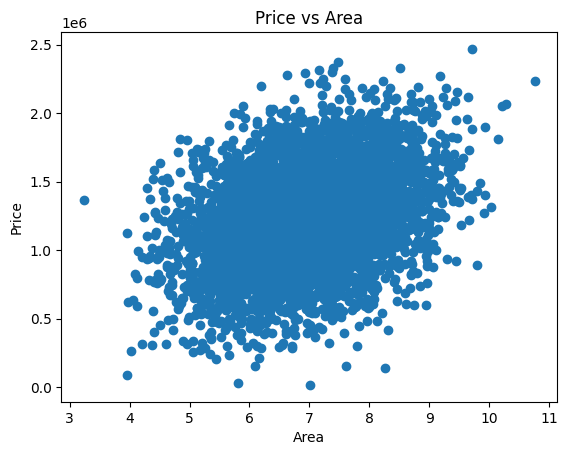

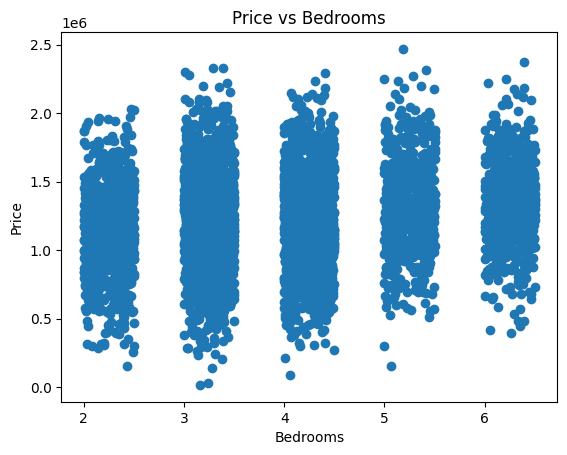

In [7]:
plt.scatter(df['area'], df['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()

plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price vs Bedrooms')
plt.show()

In [8]:
# Split into train/test sets
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
#  Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
#  Make predictions & compare
y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison.head()


,Actual,Predicted
1501,1.339096e+06,1.163425e+06
2586,1.251794e+06,1.215902e+06
2653,1.340095e+06,1.177708e+06
1055,1.431508e+06,1.331372e+06
705,1.042374e+06,1.162934e+06


In [11]:
#  Plot regression line (for single feature)
if X.shape[1] == 1:
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.xlabel('Feature')
    plt.ylabel('Price')
    plt.show()


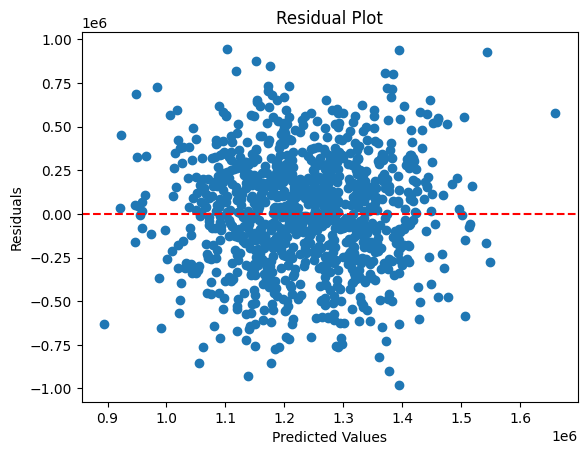

In [12]:
#  Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [13]:
#  Compute and print metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


MAE: 263882.43196728366
MSE: 107845411398.09216
R²: 0.1234393189954689


In [14]:
#  Save the model
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [15]:
#  Define prediction helper function
def predict_price(new_data):
    df_new = pd.DataFrame([new_data])
    return model.predict(df_new)[0]

# Example usage:
print(predict_price({'area': 3000, 'bedrooms': 3}))


333845015.1176142


In [16]:

%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

model = joblib.load('house_price_model.pkl')
st.title("House Price Prediction")
area = st.number_input("Area (sq ft)")
bedrooms = st.number_input("Bedrooms", min_value=1, step=1)

if st.button("Predict"):
    data = pd.DataFrame([[area, bedrooms]], columns=['area', 'bedrooms'])
    prediction = model.predict(data)[0]
    st.write(f"Estimated Price: ₹ {prediction:.2f}")


Writing app.py
